In [1]:
import pandas as pd
data =pd.read_excel("日期.xlsx")
data.head()

,日期,报告结果数
0,202,80630
1,203,101503
2,204,91477
3,205,107134
4,206,153880


In [3]:
X = data.drop(columns="报告结果数")
y = data["报告结果数"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [5]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB #引入多项式和伯努利的贝叶斯
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.metrics import classification_report   #分类报告函数classification_report()
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm               # svm函数需要的
import pandas as pd
import numpy as np                    # numpy科学计算库
from sklearn import model_selection   
import matplotlib.pyplot as plt       # 画图的库
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import mpld3
from sklearn import preprocessing
%matplotlib inline

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV

In [8]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
# print('Boston数据线性回归模型的平均绝对误差为：',
#      mean_absolute_error(y_test,y_pred))
# print('Boston数据线性回归模型的均方误差为：',
#      mean_squared_error(y_test,y_pred))
# print('Boston数据线性回归模型的中值绝对误差为：',
#      median_absolute_error(y_test,y_pred))
# print('Boston数据线性回归模型的可解释方差值为：',
#      explained_variance_score(y_test,y_pred))
# print('Boston数据线性回归模型的R方值为：',
#      r2_score(y_test,y_pred))

In [45]:
# # 基准模型 
def benchmark(clf,name):
    print("分类器:",clf)
    model =clf
    # # 训练模型
    t_start = time()
    model.fit(X_train, y_train)
    t_end = time()
    t_train =t_end-t_start
    # # 模型预测 
    t_start = time()
    y_hat = model.predict(X_test)
    t_end = time()
    t_test = t_end -t_start
    print("测试时间：%.3f秒"%t_test)
     
    # # 模型评估 
    # # 训练集
    train_acc = r2_score(y_train,
                                       model.predict(
                                           X_train))
    # # 测试集 
    test_acc =  r2_score(y_test,y_hat)
    
    #zong=classification_report(y_test, y_hat)
    print("训练集准确率:%.2f%%"%(100*train_acc))
    print("测试集准确率:%.2f%%"%(100*test_acc))
    print("准确率:%.2f%%"%(100*r2_score(y_test, y_hat)))
    print('Boston数据线性回归模型的平均绝对误差为：',
     mean_absolute_error(y_test,y_hat))
    print('Boston数据线性回归模型的均方误差为：',
     mean_squared_error(y_test,y_hat))
    print('Boston数据线性回归模型的中值绝对误差为：',
     median_absolute_error(y_test,y_hat))
    print('Boston数据线性回归模型的可解释方差值为：',
     explained_variance_score(y_test,y_hat))
    print('Boston数据线性回归模型的R方值为：',
     r2_score(y_test,y_hat))
        


#     confusion_matrix_result = mean_squared_error(y_hat,y_test)
#     np.set_printoptions(precision=2)
#     confusion_matrix = confusion_matrix_result.astype('float') / confusion_matrix_result.sum(axis=1)[:, np.newaxis]
#     plt.figure(figsize=(8,6), dpi=80)
#     sns.heatmap(confusion_matrix,annot=True, cmap='Blues')
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
# #print(confusion_matrix)
#     plt.show()
    
    # # 返回结果
    return t_train,t_test,1-train_acc,1-test_acc,name

In [46]:
from sklearn.linear_model import LogisticRegression
# # 不同分类器比较
print("分类器的比较:\n")
clfs = [
    #[RidgeClassifier(),'Ridge'],# 线性分类器-最小二乘+L2正则
    [LinearRegression(),'Linear'],# K临近
    #[PolynomialFeatures(),'Polynomial'],# 朴素贝叶斯
    [DecisionTreeRegressor(random_state = 0),'DecisionTree'],# 随机森林
    [ElasticNetCV(),'ElasticNet'],# svm:采用svc(),损失是hinge损失的绝对值
    [XGBRegressor(
    n_estimators=1000, 
    max_depth=7, 
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8,),'XGBoost'],
    
#     [LinearSVC(loss='squared_hinge',penalty='l1', # 线性可分支持向量积,平方Hinge损失+L1正则
#                dual=False,tol=1e-4),'LinearSVC-l1'],
#     [LinearSVC(loss='squared_hinge',penalty='l2', # 线性可分支持向量积,平方Hinge损失+L2正则
#                dual=False,tol=1e-4),'LinearSVC-l2']
     [RandomForestRegressor(
    n_estimators = 300, 
    random_state = 0
),'RandomForest'],
    [LassoCV(),'Lasso']

]

# # 训练数据保存到列表
result = []
for clf,name in clfs:
    # 计算结果 
    a = benchmark(clf,name)
    result.append(a)
    print('\n')
# # 
result = np.array(result)

分类器的比较:

分类器: LinearRegression()
测试时间：0.002秒
训练集准确率:67.08%
测试集准确率:68.29%
准确率:68.29%
Boston数据线性回归模型的平均绝对误差为： 43524.762820279626
Boston数据线性回归模型的均方误差为： 3080162906.8161335
Boston数据线性回归模型的中值绝对误差为： 39702.421267490136
Boston数据线性回归模型的可解释方差值为： 0.6862568104873682
Boston数据线性回归模型的R方值为： 0.6828598627466245


分类器: DecisionTreeRegressor(random_state=0)
测试时间：0.001秒
训练集准确率:100.00%
测试集准确率:98.36%
准确率:98.36%
Boston数据线性回归模型的平均绝对误差为： 6841.5352112676055
Boston数据线性回归模型的均方误差为： 159368417.81690142
Boston数据线性回归模型的中值绝对误差为： 2559.0
Boston数据线性回归模型的可解释方差值为： 0.9836154594849531
Boston数据线性回归模型的R方值为： 0.9835910880595113


分类器: ElasticNetCV()
测试时间：0.001秒
训练集准确率:55.85%
测试集准确率:52.96%
准确率:52.96%
Boston数据线性回归模型的平均绝对误差为： 47831.036543612136
Boston数据线性回归模型的均方误差为： 4568187935.790392
Boston数据线性回归模型的中值绝对误差为： 37646.57292356956
Boston数据线性回归模型的可解释方差值为： 0.5325146751712073
Boston数据线性回归模型的R方值为： 0.5296496345210157


分类器: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
   

In [47]:
result

array([['0.002407550811767578', '0.0015811920166015625',
        '0.32920190530350835', '0.31714013725337553', 'Linear'],
       ['0.003986835479736328', '0.0009801387786865234', '0.0',
        '0.016408911940488657', 'DecisionTree'],
       ['0.06387925148010254', '0.001001596450805664',
        '0.4414815785928301', '0.47035036547898434', 'ElasticNet'],
       ['0.459575891494751', '0.004990339279174805',
        '5.03829800102551e-09', '0.021142508082184208', 'XGBoost'],
       ['0.4031195640563965', '0.027312040328979492',
        '0.0016874264705004638', '0.014907187491206453', 'RandomForest'],
       ['0.06183314323425293', '0.0019948482513427734',
        '0.3292025761016031', '0.31730011945891146', 'Lasso']],
      dtype='<U32')

In [48]:
m=result
m

array([['0.002407550811767578', '0.0015811920166015625',
        '0.32920190530350835', '0.31714013725337553', 'Linear'],
       ['0.003986835479736328', '0.0009801387786865234', '0.0',
        '0.016408911940488657', 'DecisionTree'],
       ['0.06387925148010254', '0.001001596450805664',
        '0.4414815785928301', '0.47035036547898434', 'ElasticNet'],
       ['0.459575891494751', '0.004990339279174805',
        '5.03829800102551e-09', '0.021142508082184208', 'XGBoost'],
       ['0.4031195640563965', '0.027312040328979492',
        '0.0016874264705004638', '0.014907187491206453', 'RandomForest'],
       ['0.06183314323425293', '0.0019948482513427734',
        '0.3292025761016031', '0.31730011945891146', 'Lasso']],
      dtype='<U32')

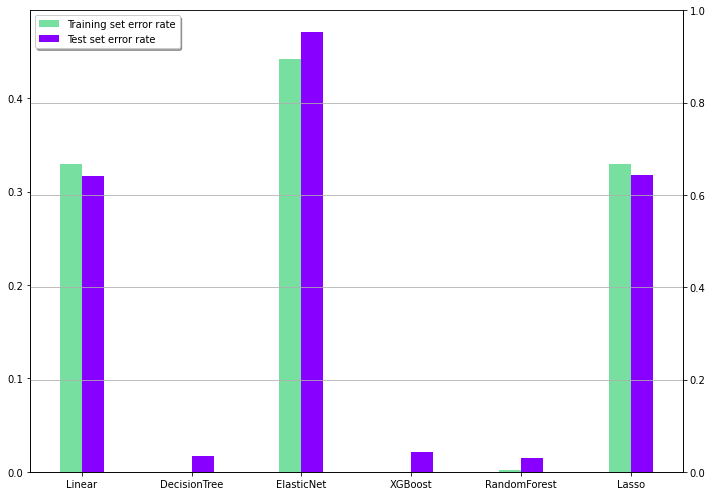

In [55]:

# 数据 
result = [[x[i] for x in m] for i in range(5)]
training_time,test_time,traning_err,test_err,clf_names =  result

#training_time = np.array(training_time).astype(np.float)
#test_time = np.array(test_time).astype(np.float)
traning_err = np.array(traning_err).astype(np.float)
test_err = np.array(test_err).astype(np.float)

# 可视化
x = np.arange(len(training_time))
plt.figure(figsize=(10,7),facecolor='w')
ax = plt.axes()
b0 = ax.bar(x+0.1,traning_err,width=0.2,color='#77E0A0')
b1 = ax.bar(x+0.3,test_err,width=0.2,color='#8800FF')
ax2 = ax.twinx()
plt.xticks(x+0.2,clf_names)
plt.legend([b0[0],b1[0]],("Training set error rate",
                            "Test set error rate"),
                                  loc = 'upper left',
                                  shadow = True)
#plt.title("酒店评论文本分类及不同分类器错误率比较",fontsize=18)
plt.xlabel("分类器名称")
plt.grid(True)
plt.tight_layout()
plt.show()

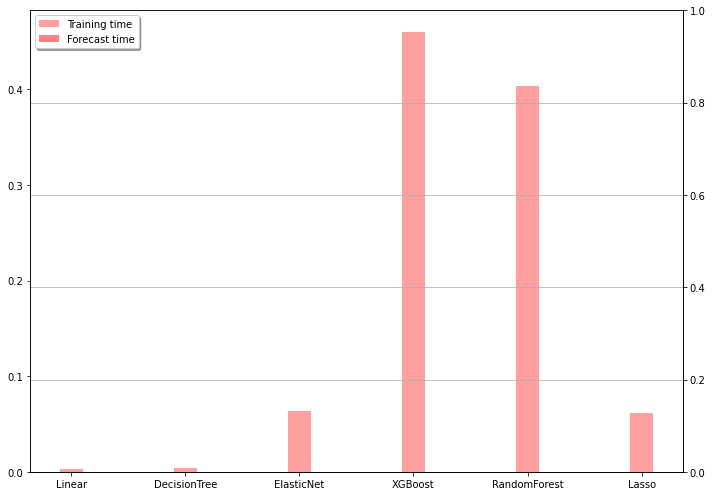

In [50]:
result = [[x[i] for x in m] for i in range(5)]
training_time,test_time,traning_err,test_err,clf_names =result
x = np.arange(len(training_time))
plt.figure(figsize=(10,7),facecolor='w')
ax = plt.axes()
training_time = np.array(training_time).astype(np.float)
test_time = np.array(test_time).astype(np.float)
b2 = ax.bar(x+0.1,training_time,width=0.2,color='#FFA0A0')
b3 = ax2.bar(x+0.3,test_time,width=0.2,color='#FF8080')
ax2 = ax.twinx()
plt.xticks(x+0.1,clf_names)
plt.legend([b2[0],b3[0]],(
                                  "Training time",
                                  "Forecast time"),
                                  loc = 'upper left',
                                  shadow = True)

#plt.title("酒店评论文本分类及不同分类器训练时间比较",fontsize=18)
plt.xlabel("分类器名称")
plt.grid(True)
plt.tight_layout()
plt.show()

### 数据分类严重不平衡，不平衡比达到 600:1

不平衡数据的识别难度很大，精确度和召回率很难达到平衡。负类识别精度低。一般用重采样、代价敏感学习来缓解。

接下来，对上述数据进行数据分析。一般有如下操作过程：

#### 数据划分、数据处理、特征工程、模型训练、模型评估、模型优化。

In [73]:
import pandas as pd
df=pd.read_excel("时间.xlsx")

In [74]:
train = df[0:283]
test = df[283:]

In [75]:
df

,日期,报告结果数
0,2022-01-07,80630
1,2022-01-08,101503
2,2022-01-09,91477
3,2022-01-10,107134
4,2022-01-11,153880
...,...,...
349,2022-12-27,20879
350,2022-12-28,20160
351,2022-12-29,20001
352,2022-12-30,21204


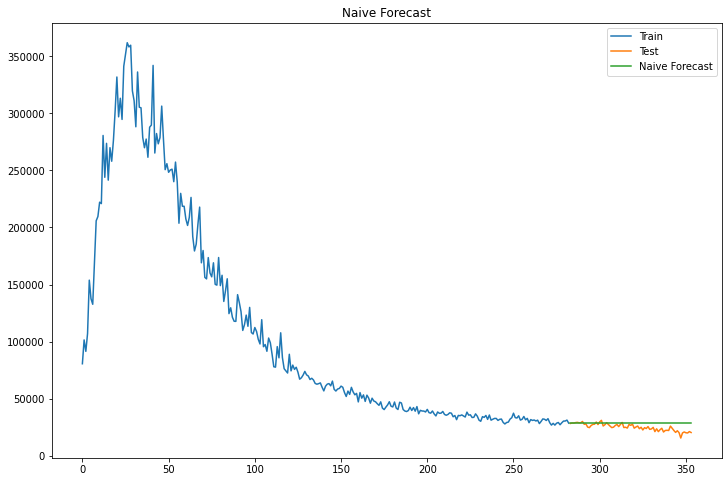

In [90]:
#朴素法
dd = np.asarray(train['报告结果数'])#训练组数据
y_hat = test.copy()#测试组数据
y_hat['naive'] = dd[len(dd) - 1]#预测组数据

#数据可视化
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['报告结果数'], label='Train')
plt.plot(test.index, test['报告结果数'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [91]:
#计算均方根误差RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# mean_squared_error求均方误差
rmse = r2_score(test['报告结果数'], y_hat['naive'])
print(rmse)


-1.2766306942642918


In [92]:
#简单平均法
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['报告结果数'].mean()


In [93]:
rmse = r2_score(test['报告结果数'],y_hat_avg['avg_forecast'])
print(rmse)

-701.1191770447739


In [94]:
#一次指数平滑
from statsmodels.tsa.api import SimpleExpSmoothing
 
y_hat_avg = test.copy()
fit = SimpleExpSmoothing(np.asarray(train['报告结果数'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit.forecast(len(test))


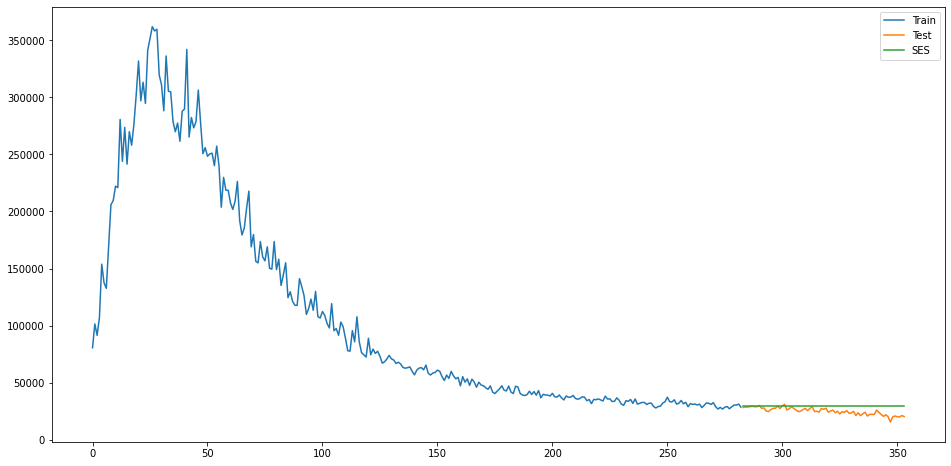

In [95]:
plt.figure(figsize=(16, 8))
plt.plot(train['报告结果数'], label='Train')
plt.plot(test['报告结果数'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [96]:
from statsmodels.tsa.api import Holt
 
y_hat_avg = test.copy()
 
fit = Holt(np.asarray(train['报告结果数'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit.forecast(len(test))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


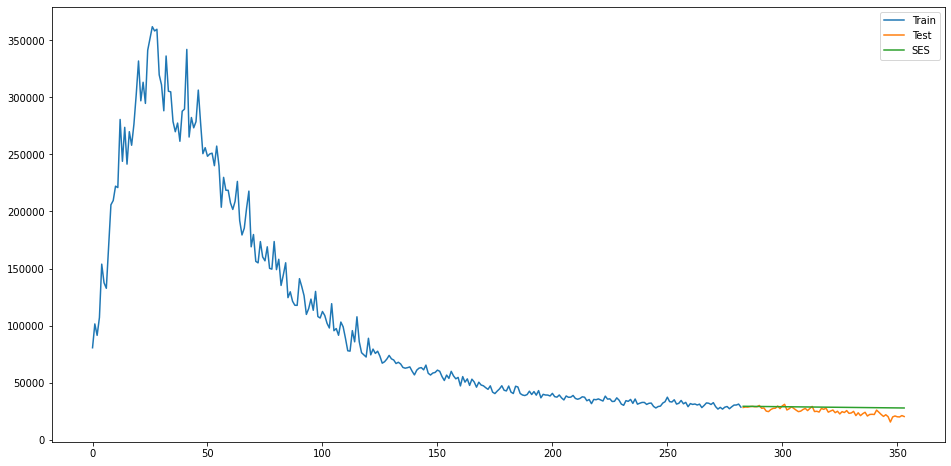

In [97]:
plt.figure(figsize=(16, 8))
plt.plot(train['报告结果数'], label='Train')
plt.plot(test['报告结果数'], label='Test')
plt.plot(y_hat_avg['Holt_linear'] , label='SES')
plt.legend(loc='best')
plt.show()

In [98]:
rmse = r2_score(test['报告结果数'],y_hat_avg['Holt_linear'])
print(rmse)

-1.0511778265056284


In [99]:
#三次指数平滑
from statsmodels.tsa.api import ExponentialSmoothing
 
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['报告结果数']), seasonal_periods=7, trend='add', seasonal='add', ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [100]:
rmse = r2_score(test['报告结果数'],y_hat_avg['Holt_Winter'])
print(rmse)

-5.75616949198343


In [103]:
from statsmodels.tsa.arima_model import ARIMA
 
ts_ARIMA= train['报告结果数'].astype(float)
fit1 = ARIMA(ts_ARIMA, order=(7, 1, 4)).fit()
y_hat_ARIMA = fit1.predict(start="2022-10-1", end="2023-12-31", dynamic=True)

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_ARIMA, label='ARIMA')
plt.legend(loc='best')
plt.show()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
 
ts_ARIMA= train['报告结果数'].astype(float)
fit1 = ARIMA(ts_ARIMA, order=(7, 1, 4)).fit()
y_hat_ARIMA = fit1.predict(start="2023-1-1", end="2023-4-1", dynamic=True)
